In [1]:
import sys
sys.path.insert(0, '../')
import ccob_qe_analysis as qe
import ccob_utils as u
import os
import glob
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
config = u.load_ccob_config("../ccob_config_MR.yaml")

In [3]:
import ccob_beam as beam

#### Choose the LED used to reconstruct the beam among [nm960, nm850, nm750, red, blue, uv]

In [4]:
config['tmp_dir']='/home/combet/tmp_MR/12x12/'
config['led_name']='red'


In [316]:
# Path to the data. Here 6593D is the run number.
# R22, baffle off
ref_raft = 'R22' # raft  
ref_slot = 'S11' # ccd in ref_raft to use for the beam reconstruction (we'll use a buch of pixels in each amp of that CCD)
baffle = 'off'
dirlist=glob.glob('/gpfs/slac/lsst/fs3/g/data/jobHarness/jh_stage-test/LCA-10134_Cryostat/LCA-10134_Cryostat-0001/6680D/BOT_acq/v0/46569/ccob_'+config['led_name']+'*')

# R22, baffle on
# ref_raft = 'R22' # raft  
# ref_slot = 'S11' # ccd in ref_raft to use for the beam reconstruction (we'll use a buch of pixels in each amp of that CCD)
# baffle = 'on'
# dirlist1=glob.glob('/gpfs/slac/lsst/fs3/g/data/jobHarness/jh_stage-test/LCA-10134_Cryostat/LCA-10134_Cryostat-0001/6681D/BOT_acq/v0/46576/ccob_'+config['led_name']+'*')
# dirlist2=glob.glob('/gpfs/slac/lsst/fs3/g/data/jobHarness/jh_stage-test/LCA-10134_Cryostat/LCA-10134_Cryostat-0001/6682D/BOT_acq/v0/46581/ccob_'+config['led_name']+'*')
# dirlist=sorted(dirlist1+dirlist2)

# R10, baffle off
# ref_raft = 'R10' # raft  
# ref_slot = 'S20' # ccd in ref_raft to use for the beam reconstruction (we'll use a buch of pixels in each amp of that CCD)
# baffle = 'off'
# dirlist=glob.glob('/gpfs/slac/lsst/fs3/g/data/jobHarness/jh_stage-test/LCA-10134_Cryostat/LCA-10134_Cryostat-0001/6678D/BOT_acq/v0/46557/ccob_'+config['led_name']+'*')

# R10, baffle on
# ref_raft = 'R10' # raft  
# ref_slot = 'S11' # ccd in ref_raft to use for the beam reconstruction (we'll use a buch of pixels in each amp of that CCD)
# baffle = 'on'
# dirlist=glob.glob('/gpfs/slac/lsst/fs3/g/data/jobHarness/jh_stage-test/LCA-10134_Cryostat/LCA-10134_Cryostat-0001/6683D/BOT_acq/v0/46587/ccob_'+config['led_name']+'*')

In [317]:
len(dirlist)

144

### Fill in beam object with raw data, using the central bunch of pixels in each channel

- ref_raft: either 'R10' (same as previous data) or 'R22' (central raft)
- ref_ccd: from S00 to S22 (S11 is the central CCD of the raft). Choose the CCD where the centre of the scan is located

In [318]:
b = beam.CcobBeam(config)

In [319]:
for i in np.arange(12): # that's just to allow saving the data at intermediate steps for the 12x12 scan
    start = i*12
    end = (i+1)*12
    b.read_multibunch(dirlist=dirlist[start:end], outdir = config['tmp_dir'], ref_raft=ref_raft, ref_slot=ref_slot)
    b.save(os.path.join(config['tmp_dir'],'beam_object_'+ref_raft+'_'+ref_slot+'_'+b.config['led_name']+'_'+baffle+'.pkl'))

/gpfs/slac/lsst/fs3/g/data/jobHarness/jh_stage-test/LCA-10134_Cryostat/LCA-10134_Cryostat-0001/6680D/BOT_acq/v0/46569/ccob_red_-16.5_-16.5_235
1 -16.5 -16.5 -16.5 -16.5 64242.0
2 -16.5 -16.5 -16.5 -16.5 63600.3
3 -16.5 -16.5 -16.5 -16.5 62939.8
4 -16.5 -16.5 -16.5 -16.5 62188.1
5 -16.5 -16.5 -16.5 -16.5 61692.4
6 -16.5 -16.5 -16.5 -16.5 60878.3
7 -16.5 -16.5 -16.5 -16.5 61162.8
8 -16.5 -16.5 -16.5 -16.5 62391.4
9 -16.5 -16.5 -16.5 -16.5 60540.4
10 -16.5 -16.5 -16.5 -16.5 60898.7
11 -16.5 -16.5 -16.5 -16.5 61126.6
12 -16.5 -16.5 -16.5 -16.5 61204.8
13 -16.5 -16.5 -16.5 -16.5 62039.4
14 -16.5 -16.5 -16.5 -16.5 62541.4
15 -16.5 -16.5 -16.5 -16.5 63306.1
16 -16.5 -16.5 -16.5 -16.5 61315.4
/gpfs/slac/lsst/fs3/g/data/jobHarness/jh_stage-test/LCA-10134_Cryostat/LCA-10134_Cryostat-0001/6680D/BOT_acq/v0/46569/ccob_red_-23.1_-29.7_151
1 -23.1 -23.1 -29.7 -29.7 62824.3
2 -23.1 -23.1 -29.7 -29.7 61941.0
3 -23.1 -23.1 -29.7 -29.7 60961.3
4 -23.1 -23.1 -29.7 -29.7 59911.7
5 -23.1 -23.1 -29.7 -29.7 5

7 -16.5 -16.5 -23.1 -23.1 59504.7
8 -16.5 -16.5 -23.1 -23.1 60614.6
9 -16.5 -16.5 -23.1 -23.1 58740.6
10 -16.5 -16.5 -23.1 -23.1 59107.8
11 -16.5 -16.5 -23.1 -23.1 59570.8
12 -16.5 -16.5 -23.1 -23.1 59975.2
13 -16.5 -16.5 -23.1 -23.1 60981.8
14 -16.5 -16.5 -23.1 -23.1 61689.3
15 -16.5 -16.5 -23.1 -23.1 62614.4
16 -16.5 -16.5 -23.1 -23.1 60814.5
/gpfs/slac/lsst/fs3/g/data/jobHarness/jh_stage-test/LCA-10134_Cryostat/LCA-10134_Cryostat-0001/6680D/BOT_acq/v0/46569/ccob_red_-16.5_3.3_253
1 -16.5 -16.5 3.3 3.3 65004.0
2 -16.5 -16.5 3.3 3.3 64914.6
3 -16.5 -16.5 3.3 3.3 64871.7
4 -16.5 -16.5 3.3 3.3 64755.9
5 -16.5 -16.5 3.3 3.3 64682.3
6 -16.5 -16.5 3.3 3.3 64187.4
7 -16.5 -16.5 3.3 3.3 64502.0
8 -16.5 -16.5 3.3 3.3 65778.4
9 -16.5 -16.5 3.3 3.3 63885.9
10 -16.5 -16.5 3.3 3.3 64371.8
11 -16.5 -16.5 3.3 3.3 64671.4
12 -16.5 -16.5 3.3 3.3 64624.3
13 -16.5 -16.5 3.3 3.3 65004.5
14 -16.5 -16.5 3.3 3.3 64855.0
15 -16.5 -16.5 3.3 3.3 64866.9
16 -16.5 -16.5 3.3 3.3 62206.0
/gpfs/slac/lsst/fs3/g/dat

6 -16.5 -16.5 29.7 29.7 63823.5
7 -16.5 -16.5 29.7 29.7 64367.7
8 -16.5 -16.5 29.7 29.7 66105.0
9 -16.5 -16.5 29.7 29.7 63907.3
10 -16.5 -16.5 29.7 29.7 64037.8
11 -16.5 -16.5 29.7 29.7 64319.4
12 -16.5 -16.5 29.7 29.7 64345.7
13 -16.5 -16.5 29.7 29.7 64826.2
14 -16.5 -16.5 29.7 29.7 64766.8
15 -16.5 -16.5 29.7 29.7 64720.5
16 -16.5 -16.5 29.7 29.7 61772.6
/gpfs/slac/lsst/fs3/g/data/jobHarness/jh_stage-test/LCA-10134_Cryostat/LCA-10134_Cryostat-0001/6680D/BOT_acq/v0/46569/ccob_red_-36.3_36.3_067
1 -36.3 -36.3 36.3 36.3 62638.9
2 -36.3 -36.3 36.3 36.3 62867.9
3 -36.3 -36.3 36.3 36.3 62972.9
4 -36.3 -36.3 36.3 36.3 62840.5
5 -36.3 -36.3 36.3 36.3 62781.5
6 -36.3 -36.3 36.3 36.3 62394.5
7 -36.3 -36.3 36.3 36.3 63062.1
8 -36.3 -36.3 36.3 36.3 64909.3
9 -36.3 -36.3 36.3 36.3 63907.7
10 -36.3 -36.3 36.3 36.3 63719.4
11 -36.3 -36.3 36.3 36.3 63530.6
12 -36.3 -36.3 36.3 36.3 63120.2
13 -36.3 -36.3 36.3 36.3 63323.8
14 -36.3 -36.3 36.3 36.3 63114.0
15 -36.3 -36.3 36.3 36.3 62999.3
16 -36.3 -36.

9 -36.3 -36.3 23.1 23.1 64034.3
10 -36.3 -36.3 23.1 23.1 64132.3
11 -36.3 -36.3 23.1 23.1 64238.0
12 -36.3 -36.3 23.1 23.1 64131.8
13 -36.3 -36.3 23.1 23.1 64576.3
14 -36.3 -36.3 23.1 23.1 64509.0
15 -36.3 -36.3 23.1 23.1 64507.7
16 -36.3 -36.3 23.1 23.1 61687.3
/gpfs/slac/lsst/fs3/g/data/jobHarness/jh_stage-test/LCA-10134_Cryostat/LCA-10134_Cryostat-0001/6680D/BOT_acq/v0/46569/ccob_red_-9.9_-23.1_301
1 -9.9 -9.9 -23.1 -23.1 63702.7
2 -9.9 -9.9 -23.1 -23.1 62934.8
3 -9.9 -9.9 -23.1 -23.1 62140.5
4 -9.9 -9.9 -23.1 -23.1 61197.7
5 -9.9 -9.9 -23.1 -23.1 60480.4
6 -9.9 -9.9 -23.1 -23.1 59457.2
7 -9.9 -9.9 -23.1 -23.1 59306.2
8 -9.9 -9.9 -23.1 -23.1 60228.8
9 -9.9 -9.9 -23.1 -23.1 58383.1
10 -9.9 -9.9 -23.1 -23.1 58758.5
11 -9.9 -9.9 -23.1 -23.1 59158.5
12 -9.9 -9.9 -23.1 -23.1 59533.2
13 -9.9 -9.9 -23.1 -23.1 60553.2
14 -9.9 -9.9 -23.1 -23.1 61231.8
15 -9.9 -9.9 -23.1 -23.1 62125.6
16 -9.9 -9.9 -23.1 -23.1 60357.3
/gpfs/slac/lsst/fs3/g/data/jobHarness/jh_stage-test/LCA-10134_Cryostat/LCA-1

7 -36.3 -36.3 -9.9 -9.9 61877.8
8 -36.3 -36.3 -9.9 -9.9 63142.0
9 -36.3 -36.3 -9.9 -9.9 61126.6
10 -36.3 -36.3 -9.9 -9.9 61614.6
11 -36.3 -36.3 -9.9 -9.9 62073.7
12 -36.3 -36.3 -9.9 -9.9 62259.3
13 -36.3 -36.3 -9.9 -9.9 63045.8
14 -36.3 -36.3 -9.9 -9.9 63511.9
15 -36.3 -36.3 -9.9 -9.9 64146.0
16 -36.3 -36.3 -9.9 -9.9 62013.1
/gpfs/slac/lsst/fs3/g/data/jobHarness/jh_stage-test/LCA-10134_Cryostat/LCA-10134_Cryostat-0001/6680D/BOT_acq/v0/46569/ccob_red_-9.9_16.5_337
1 -9.9 -9.9 16.5 16.5 64753.1
2 -9.9 -9.9 16.5 16.5 64939.2
3 -9.9 -9.9 16.5 16.5 65008.1
4 -9.9 -9.9 16.5 16.5 64823.3
5 -9.9 -9.9 16.5 16.5 64740.3
6 -9.9 -9.9 16.5 16.5 64206.7
7 -9.9 -9.9 16.5 16.5 64519.0
8 -9.9 -9.9 16.5 16.5 65952.1
9 -9.9 -9.9 16.5 16.5 63955.4
10 -9.9 -9.9 16.5 16.5 64455.7
11 -9.9 -9.9 16.5 16.5 64821.1
12 -9.9 -9.9 16.5 16.5 64787.9
13 -9.9 -9.9 16.5 16.5 65235.8
14 -9.9 -9.9 16.5 16.5 65177.0
15 -9.9 -9.9 16.5 16.5 65167.4
16 -9.9 -9.9 16.5 16.5 62198.6
/gpfs/slac/lsst/fs3/g/data/jobHarness/jh_stag

7 -3.3 -3.3 3.3 3.3 63202.0
8 -3.3 -3.3 3.3 3.3 64522.9
9 -3.3 -3.3 3.3 3.3 62641.5
10 -3.3 -3.3 3.3 3.3 63087.6
11 -3.3 -3.3 3.3 3.3 63426.4
12 -3.3 -3.3 3.3 3.3 63400.4
13 -3.3 -3.3 3.3 3.3 63818.3
14 -3.3 -3.3 3.3 3.3 63718.8
15 -3.3 -3.3 3.3 3.3 63696.6
16 -3.3 -3.3 3.3 3.3 61058.6
/gpfs/slac/lsst/fs3/g/data/jobHarness/jh_stage-test/LCA-10134_Cryostat/LCA-10134_Cryostat-0001/6680D/BOT_acq/v0/46569/ccob_red_-36.3_29.7_061
1 -36.3 -36.3 29.7 29.7 63542.8
2 -36.3 -36.3 29.7 29.7 63810.0
3 -36.3 -36.3 29.7 29.7 63947.9
4 -36.3 -36.3 29.7 29.7 63821.8
5 -36.3 -36.3 29.7 29.7 63731.9
6 -36.3 -36.3 29.7 29.7 63187.2
7 -36.3 -36.3 29.7 29.7 63544.1
8 -36.3 -36.3 29.7 29.7 65131.7
9 -36.3 -36.3 29.7 29.7 64039.8
10 -36.3 -36.3 29.7 29.7 64008.6
11 -36.3 -36.3 29.7 29.7 63957.8
12 -36.3 -36.3 29.7 29.7 63691.1
13 -36.3 -36.3 29.7 29.7 64058.4
14 -36.3 -36.3 29.7 29.7 63991.8
15 -36.3 -36.3 29.7 29.7 63947.9
16 -36.3 -36.3 29.7 29.7 61075.0
/gpfs/slac/lsst/fs3/g/data/jobHarness/jh_stage-test/

6 -36.3 -36.3 -29.7 -29.7 57113.2
7 -36.3 -36.3 -29.7 -29.7 56967.8
8 -36.3 -36.3 -29.7 -29.7 57847.1
9 -36.3 -36.3 -29.7 -29.7 56660.1
10 -36.3 -36.3 -29.7 -29.7 57508.4
11 -36.3 -36.3 -29.7 -29.7 58368.0
12 -36.3 -36.3 -29.7 -29.7 59034.0
13 -36.3 -36.3 -29.7 -29.7 60234.3
14 -36.3 -36.3 -29.7 -29.7 61156.1
15 -36.3 -36.3 -29.7 -29.7 62210.8
16 -36.3 -36.3 -29.7 -29.7 60565.0
/gpfs/slac/lsst/fs3/g/data/jobHarness/jh_stage-test/LCA-10134_Cryostat/LCA-10134_Cryostat-0001/6680D/BOT_acq/v0/46569/ccob_red_-36.3_-3.3_031
1 -36.3 -36.3 -3.3 -3.3 63810.2
2 -36.3 -36.3 -3.3 -3.3 63538.1
3 -36.3 -36.3 -3.3 -3.3 63378.0
4 -36.3 -36.3 -3.3 -3.3 63206.9
5 -36.3 -36.3 -3.3 -3.3 63188.7
6 -36.3 -36.3 -3.3 -3.3 62688.7
7 -36.3 -36.3 -3.3 -3.3 63010.9
8 -36.3 -36.3 -3.3 -3.3 64279.1
9 -36.3 -36.3 -3.3 -3.3 62285.1
10 -36.3 -36.3 -3.3 -3.3 62710.6
11 -36.3 -36.3 -3.3 -3.3 63012.3
12 -36.3 -36.3 -3.3 -3.3 63081.5
13 -36.3 -36.3 -3.3 -3.3 63743.4
14 -36.3 -36.3 -3.3 -3.3 64013.4
15 -36.3 -36.3 -3.3 -3.3

5 23.1 23.1 -36.3 -36.3 55478.2
6 23.1 23.1 -36.3 -36.3 54277.9
7 23.1 23.1 -36.3 -36.3 53944.8
8 23.1 23.1 -36.3 -36.3 54491.2
9 23.1 23.1 -36.3 -36.3 50242.6
10 23.1 23.1 -36.3 -36.3 51123.9
11 23.1 23.1 -36.3 -36.3 51965.1
12 23.1 23.1 -36.3 -36.3 52635.9
13 23.1 23.1 -36.3 -36.3 53841.2
14 23.1 23.1 -36.3 -36.3 54711.6
15 23.1 23.1 -36.3 -36.3 55775.2
16 23.1 23.1 -36.3 -36.3 54374.6
/gpfs/slac/lsst/fs3/g/data/jobHarness/jh_stage-test/LCA-10134_Cryostat/LCA-10134_Cryostat-0001/6680D/BOT_acq/v0/46569/ccob_red_29.7_9.9_763
1 29.7 29.7 9.9 9.9 60664.8
2 29.7 29.7 9.9 9.9 60504.7
3 29.7 29.7 9.9 9.9 60293.8
4 29.7 29.7 9.9 9.9 59947.4
5 29.7 29.7 9.9 9.9 59782.8
6 29.7 29.7 9.9 9.9 59280.4
7 29.7 29.7 9.9 9.9 59644.0
8 29.7 29.7 9.9 9.9 61009.6
9 29.7 29.7 9.9 9.9 55846.8
10 29.7 29.7 9.9 9.9 56113.2
11 29.7 29.7 9.9 9.9 56329.1
12 29.7 29.7 9.9 9.9 56285.7
13 29.7 29.7 9.9 9.9 56750.2
14 29.7 29.7 9.9 9.9 56877.0
15 29.7 29.7 9.9 9.9 57144.7
16 29.7 29.7 9.9 9.9 54925.7
/gpfs/slac/lss

6 -36.3 -36.3 3.3 3.3 63527.0
7 -36.3 -36.3 3.3 3.3 63845.4
8 -36.3 -36.3 3.3 3.3 65111.7
9 -36.3 -36.3 3.3 3.3 63086.2
10 -36.3 -36.3 3.3 3.3 63497.3
11 -36.3 -36.3 3.3 3.3 63814.0
12 -36.3 -36.3 3.3 3.3 63772.8
13 -36.3 -36.3 3.3 3.3 64282.4
14 -36.3 -36.3 3.3 3.3 64396.4
15 -36.3 -36.3 3.3 3.3 64702.8
16 -36.3 -36.3 3.3 3.3 62265.6
/gpfs/slac/lsst/fs3/g/data/jobHarness/jh_stage-test/LCA-10134_Cryostat/LCA-10134_Cryostat-0001/6680D/BOT_acq/v0/46569/ccob_red_16.5_9.9_619
1 16.5 16.5 9.9 9.9 62724.0
2 16.5 16.5 9.9 9.9 62555.2
3 16.5 16.5 9.9 9.9 62317.0
4 16.5 16.5 9.9 9.9 61947.4
5 16.5 16.5 9.9 9.9 61782.4
6 16.5 16.5 9.9 9.9 61268.6
7 16.5 16.5 9.9 9.9 61639.9
8 16.5 16.5 9.9 9.9 63048.2
9 16.5 16.5 9.9 9.9 58862.8
10 16.5 16.5 9.9 9.9 59218.2
11 16.5 16.5 9.9 9.9 59476.6
12 16.5 16.5 9.9 9.9 59457.9
13 16.5 16.5 9.9 9.9 59926.4
14 16.5 16.5 9.9 9.9 59993.3
15 16.5 16.5 9.9 9.9 60157.9
16 16.5 16.5 9.9 9.9 57678.3
/gpfs/slac/lsst/fs3/g/data/jobHarness/jh_stage-test/LCA-10134_Cryost

6 29.7 29.7 -36.3 -36.3 53426.6
7 29.7 29.7 -36.3 -36.3 53110.3
8 29.7 29.7 -36.3 -36.3 53622.7
9 29.7 29.7 -36.3 -36.3 49112.1
10 29.7 29.7 -36.3 -36.3 49920.0
11 29.7 29.7 -36.3 -36.3 50741.2
12 29.7 29.7 -36.3 -36.3 51373.0
13 29.7 29.7 -36.3 -36.3 52499.0
14 29.7 29.7 -36.3 -36.3 53392.5
15 29.7 29.7 -36.3 -36.3 54443.7
16 29.7 29.7 -36.3 -36.3 53075.1
/gpfs/slac/lsst/fs3/g/data/jobHarness/jh_stage-test/LCA-10134_Cryostat/LCA-10134_Cryostat-0001/6680D/BOT_acq/v0/46569/ccob_red_29.7_23.1_775
1 29.7 29.7 23.1 23.1 59644.9
2 29.7 29.7 23.1 23.1 59751.6
3 29.7 29.7 23.1 23.1 59789.2
4 29.7 29.7 23.1 23.1 59710.1
5 29.7 29.7 23.1 23.1 59812.3
6 29.7 29.7 23.1 23.1 59550.4
7 29.7 29.7 23.1 23.1 60174.8
8 29.7 29.7 23.1 23.1 61822.3
9 29.7 29.7 23.1 23.1 56455.3
10 29.7 29.7 23.1 23.1 56504.5
11 29.7 29.7 23.1 23.1 56508.5
12 29.7 29.7 23.1 23.1 56269.3
13 29.7 29.7 23.1 23.1 56552.0
14 29.7 29.7 23.1 23.1 56441.1
15 29.7 29.7 23.1 23.1 56500.2
16 29.7 29.7 23.1 23.1 54096.8
/gpfs/slac/ls

6 9.9 9.9 -29.7 -29.7 56936.0
7 9.9 9.9 -29.7 -29.7 56716.0
8 9.9 9.9 -29.7 -29.7 57390.1
9 9.9 9.9 -29.7 -29.7 53934.8
10 9.9 9.9 -29.7 -29.7 54696.9
11 9.9 9.9 -29.7 -29.7 55436.0
12 9.9 9.9 -29.7 -29.7 56025.2
13 9.9 9.9 -29.7 -29.7 57134.6
14 9.9 9.9 -29.7 -29.7 57906.1
15 9.9 9.9 -29.7 -29.7 58888.8
16 9.9 9.9 -29.7 -29.7 57307.5
/gpfs/slac/lsst/fs3/g/data/jobHarness/jh_stage-test/LCA-10134_Cryostat/LCA-10134_Cryostat-0001/6680D/BOT_acq/v0/46569/ccob_red_9.9_23.1_559
1 9.9 9.9 23.1 23.1 62509.5
2 9.9 9.9 23.1 23.1 62635.4
3 9.9 9.9 23.1 23.1 62649.3
4 9.9 9.9 23.1 23.1 62534.6
5 9.9 9.9 23.1 23.1 62583.4
6 9.9 9.9 23.1 23.1 62312.1
7 9.9 9.9 23.1 23.1 62948.9
8 9.9 9.9 23.1 23.1 64650.5
9 9.9 9.9 23.1 23.1 60657.7
10 9.9 9.9 23.1 23.1 60853.4
11 9.9 9.9 23.1 23.1 61048.3
12 9.9 9.9 23.1 23.1 60986.7
13 9.9 9.9 23.1 23.1 61427.1
14 9.9 9.9 23.1 23.1 61391.3
15 9.9 9.9 23.1 23.1 61425.4
16 9.9 9.9 23.1 23.1 58677.2
/gpfs/slac/lsst/fs3/g/data/jobHarness/jh_stage-test/LCA-10134_Cryost

1 29.7 29.7 3.3 3.3 60922.1
2 29.7 29.7 3.3 3.3 60638.3
3 29.7 29.7 3.3 3.3 60271.5
4 29.7 29.7 3.3 3.3 59791.6
5 29.7 29.7 3.3 3.3 59517.3
6 29.7 29.7 3.3 3.3 58883.6
7 29.7 29.7 3.3 3.3 59137.1
8 29.7 29.7 3.3 3.3 60353.3
9 29.7 29.7 3.3 3.3 55309.1
10 29.7 29.7 3.3 3.3 55670.0
11 29.7 29.7 3.3 3.3 55950.9
12 29.7 29.7 3.3 3.3 56032.9
13 29.7 29.7 3.3 3.3 56599.4
14 29.7 29.7 3.3 3.3 56831.3
15 29.7 29.7 3.3 3.3 57216.7
16 29.7 29.7 3.3 3.3 55062.8
/gpfs/slac/lsst/fs3/g/data/jobHarness/jh_stage-test/LCA-10134_Cryostat/LCA-10134_Cryostat-0001/6680D/BOT_acq/v0/46569/ccob_red_3.3_-29.7_439
1 3.3 3.3 -29.7 -29.7 62579.8
2 3.3 3.3 -29.7 -29.7 61657.7
3 3.3 3.3 -29.7 -29.7 60648.3
4 3.3 3.3 -29.7 -29.7 59558.8
5 3.3 3.3 -29.7 -29.7 58633.7
6 3.3 3.3 -29.7 -29.7 57429.2
7 3.3 3.3 -29.7 -29.7 57141.8
8 3.3 3.3 -29.7 -29.7 57859.8
9 3.3 3.3 -29.7 -29.7 54953.0
10 3.3 3.3 -29.7 -29.7 55650.9
11 3.3 3.3 -29.7 -29.7 56372.0
12 3.3 3.3 -29.7 -29.7 56928.7
13 3.3 3.3 -29.7 -29.7 58048.1
14 3.3 3.3

In [330]:
print(bb.raw_data['xarr'][135],bb.raw_data['yarr'][135],bb.raw_data['val'][12][135])

36.3 -16.5 52829.8


### Load the beam object created above...

In [4]:
import pickle as pkl
config['tmp_dir']='/home/combet/tmp_MR/60x60/'
ref_raft='R22'
ref_slot='S21'
baffle='on'
#led = b.config['led_name']
led = 'nm850'
bb = pkl.load(open(config['tmp_dir']+'beam_object_'+ref_raft+'_'+ref_slot+'_'+led+'_'+baffle+'.pkl','rb'))

### ... and plot the raw beam reconstruction

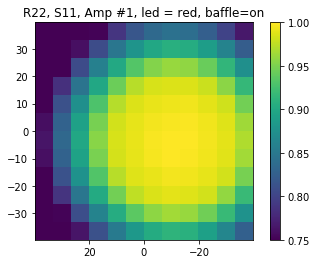

In [12]:
amp=1 # 1-16, select the channel used for the reconstruction

binsize = (max(bb.raw_data['yarr'])-min(bb.raw_data['yarr']))/11
extent = [max(bb.raw_data['xarr'])+binsize/2,
          min(bb.raw_data['xarr'])-binsize/2,
          min(bb.raw_data['yarr'])-binsize/2, 
          max(bb.raw_data['yarr'])+binsize/2]

tmp = np.asarray(bb.raw_data['val'][amp])/np.asarray(bb.raw_data['pd_value']) # correct for the control photodiode value
tmp = tmp / max(tmp) # normalise to the max

plt.imshow(np.flip(np.reshape(tmp,(12,12), order='F'),axis=1), extent=extent, origin='lower', vmin=0.75)
plt.title(ref_raft+', '+ref_slot+', Amp #'+str(amp)+', led = '+led+', baffle='+baffle)
plt.colorbar()
basename = ref_raft+'_'+ref_slot+'_'+str(amp)+'_'+baffle
plt.savefig(config['tmp_dir']+'/beam_'+basename+'_'+led+'.png')


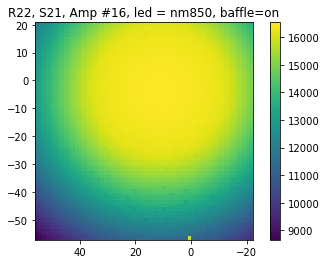

In [6]:
amp=16 # 1-16, select the channel used for the reconstruction

binsize = (max(bb.raw_data['yarr'])-min(bb.raw_data['yarr']))/59
extent = [max(bb.raw_data['xarr'])+binsize/2,
          min(bb.raw_data['xarr'])-binsize/2,
          min(bb.raw_data['yarr'])-binsize/2, 
          max(bb.raw_data['yarr'])+binsize/2]

tmp = np.asarray(bb.raw_data['val'][amp])/np.asarray(bb.raw_data['pd_value']) # correct for the control photodiode value
#tmp = tmp / max(tmp) # normalise to the max

plt.imshow(np.flip(np.reshape(tmp,(60,60), order='F'),axis=1), extent=extent, origin='lower')
plt.title(ref_raft+', '+ref_slot+', Amp #'+str(amp)+', led = '+led+', baffle='+baffle)
plt.colorbar()
basename = ref_raft+'_'+ref_slot+'_'+str(amp)+'_'+baffle
plt.savefig(config['tmp_dir']+'/beam_'+basename+'_'+led+'.png')

### I suspect that for the beam reconstruction for scan centered over R22, the above will fail 

The y-ordering of the data will most likely be wrong (I expect a clear discontinuity in the image above). I'll correct it when I get back. So below, I use `tricontourf` which does not require any ordering of the data (so it should be fine even for the R22 scan). It's not really raw data anymore as `tricontourf` does some interpolation. Blue crosses locate where the data was taken (corresponding to the pixels in the image above).

NB: x-axis increases to the right here, hence the reversal w.r.t the previous plot.


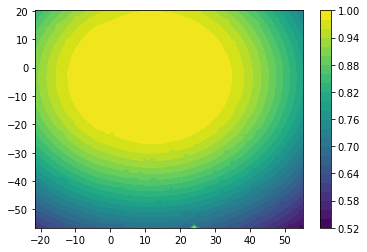

In [70]:
#plt.plot(bb.raw_data['xarr'],bb.raw_data['yarr'], 'b+ ')
plt.tricontourf(bb.raw_data['xarr'],bb.raw_data['yarr'],tmp, 30, aspect='equal')
plt.colorbar()

In [5]:
import pickle as pkl
config['tmp_dir']='/home/combet/tmp_MR/12x12/'
rafts = ['R22', 'R10']
slots = ['S10','S11','S12','S20','S21','S22']
amps = np.arange(1,17)
baffle='on'
#led = b.config['led_name']
led = 'nm960'

for ref_raft in rafts:
    for ref_slot in slots:
        bb = pkl.load(open(config['tmp_dir']+'beam_object_'+ref_raft+'_'+ref_slot+'_'+led+'_'+baffle+'.pkl','rb'))
        for amp in amps:
            binsize = (max(bb.raw_data['yarr'])-min(bb.raw_data['yarr']))/11
            extent = [max(bb.raw_data['xarr'])+binsize/2,
                      min(bb.raw_data['xarr'])-binsize/2,
                      min(bb.raw_data['yarr'])-binsize/2, 
                      max(bb.raw_data['yarr'])+binsize/2]

            tmp = np.asarray(bb.raw_data['val'][amp])/np.asarray(bb.raw_data['pd_value']) # correct for the control photodiode value
            tmp = tmp / max(tmp) # normalise to the max
            
            plt.imshow(np.flip(np.reshape(tmp,(12,12), order='F'),axis=1), extent=extent, origin='lower', vmin=0.75)
            plt.title(ref_raft+', '+ref_slot+', Amp #'+str(amp)+', led = '+led+', baffle='+baffle)
            plt.colorbar()
            basename = ref_raft+'_'+ref_slot+'_'+str(amp)+'_'+baffle
            plt.savefig(config['tmp_dir']+'/beam_'+basename+'_'+led+'.png')
            plt.close()

In [9]:
import pickle as pkl
config['tmp_dir']='/home/combet/tmp_MR/12x12/'
ref_raft = 'R22'
leds = ['nm960', 'nm850', 'nm750', 'red', 'blue', 'uv']
ref_slot = 'S11'
amp = 1
baffle='on'
#led = b.config['led_name']
bb_ref = pkl.load(open(config['tmp_dir']+'beam_object_'+ref_raft+'_'+ref_slot+'_red_'+baffle+'.pkl','rb'))
tmp_ref = np.asarray(bb_ref.raw_data['val'][amp])/np.asarray(bb_ref.raw_data['pd_value']) # correct for the control photodiode value
tmp_ref = tmp_ref / max(tmp_ref)

for led in leds:
    bb = pkl.load(open(config['tmp_dir']+'beam_object_'+ref_raft+'_'+ref_slot+'_'+led+'_'+baffle+'.pkl','rb'))
       
    binsize = (max(bb.raw_data['yarr'])-min(bb.raw_data['yarr']))/11
    extent = [max(bb.raw_data['xarr'])+binsize/2,
              min(bb.raw_data['xarr'])-binsize/2,
              min(bb.raw_data['yarr'])-binsize/2, 
              max(bb.raw_data['yarr'])+binsize/2]

    tmp = np.asarray(bb.raw_data['val'][amp])/np.asarray(bb.raw_data['pd_value']) # correct for the control photodiode value
    tmp = tmp / max(tmp) # normalise to the max

    plt.imshow(np.flip(np.reshape(tmp/tmp_ref,(12,12), order='F'),axis=1), extent=extent, origin='lower')
    plt.title(ref_raft+', '+ref_slot+', Amp #'+str(amp)+', led = '+led+', baffle='+baffle)
    plt.colorbar()
    basename = ref_raft+'_'+ref_slot+'_'+str(amp)+'_'+baffle
    plt.savefig(config['tmp_dir']+'/beam_'+basename+'_'+led+'_ratio_to_red.png')
    plt.close()